In [19]:
from PIL import Image
import numpy as np
from utils.transforms import RandomCrop,Resize,Normalize
from matplotlib import pyplot as plt
import pandas as pd
import os

In [20]:
key_pts_frame = pd.read_csv('data/training_frames_keypoints.csv')
key_pts_values = key_pts_frame.values[:, 1:]  # 取出标签信息
data_mean = key_pts_values.mean()  # 计算均值
data_std = key_pts_values.std()

In [21]:
resize = Resize(256)
crop = RandomCrop(240)
norm = Normalize(scale=100)

In [22]:
n = 20
data_path = 'data/training_frames_keypoints.csv'
key_pts_frame = pd.read_csv(data_path)
image_name = key_pts_frame.iloc[n,0]
path = os.path.join("data/training/",image_name)
key_pts = key_pts_frame.iloc[n,1:].values
key_pts = key_pts.astype('float').reshape(-1)
key_pts,path

(array([ 44.,  62.,  44.,  70.,  46.,  77.,  46.,  85.,  48.,  94.,  52.,
        100.,  59., 105.,  65., 109.,  76., 113.,  86., 111.,  91., 109.,
         95., 105., 101., 101., 105.,  93., 108.,  86., 110.,  78., 112.,
         71.,  57.,  51.,  63.,  49.,  69.,  50.,  74.,  50.,  78.,  52.,
         95.,  54.,  99.,  54., 103.,  54., 108.,  56., 112.,  61.,  86.,
         60.,  84.,  67.,  84.,  71.,  84.,  75.,  76.,  79.,  80.,  79.,
         82.,  82.,  86.,  82.,  88.,  82.,  63.,  58.,  67.,  58.,  71.,
         58.,  76.,  60.,  71.,  62.,  67.,  60.,  93.,  65.,  97.,  63.,
        101.,  63., 105.,  65., 101.,  67.,  97.,  65.,  67.,  90.,  71.,
         86.,  80.,  86.,  82.,  86.,  84.,  86.,  91.,  90.,  91.,  94.,
         88.,  97.,  84.,  99.,  80.,  99.,  76.,  98.,  71.,  94.,  67.,
         90.,  78.,  88.,  82.,  88.,  84.,  90.,  91.,  94.,  84.,  94.,
         80.,  94.,  76.,  94.]),
 'data/training/Sanjay_Gupta_11.jpg')

In [23]:
def show_keypoints(image, key_pts):
    """
    Args:
        image: 图像信息
        key_pts: 关键点信息，
    展示图片和关键点信息
    """
    plt.imshow(np.array(image,dtype=np.uint8))  # 展示图片信息
    for i in range(len(key_pts)//2,):
        plt.scatter(key_pts[i*2], key_pts[i*2+1], s=20, marker='.', c='b') # 展示关键点信息

(240, 240, 3)


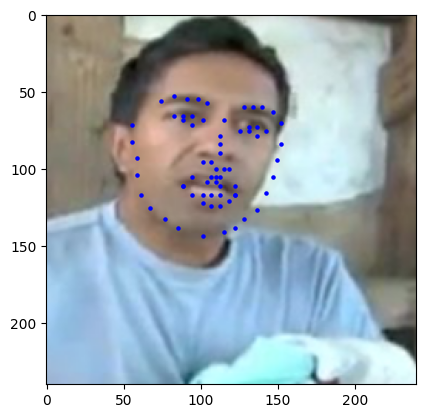

In [24]:
image = Image.open(path).convert("RGB")
image,labels = resize([image,key_pts])
image_show,labels = crop([image,labels])
image,labels = norm([image_show,labels])
labels = labels * 100
show_keypoints(image, labels)
print(image.shape)